In [1]:
def gradientDecent(gradient, x_init, alpha, max_iters=10000, precision=1e-8):
    x = x_init
    iterations = 0
    while abs(gradient(x)) > precision and iterations < max_iters:
        x = x-alpha*gradient(x)
        iterations += 1
    x_opt = x 

    return x_opt, iterations

In [2]:
def f(x):
    return x**2 + 3*x + 5

def gradient_f(x):
    return 2*x + 3

In [3]:
x_init = 2.4
alpha = 0.25

x_optimal,steps = gradientDecent(gradient_f,x_init,alpha)
print(x_optimal)
print("min f(x)",f(x_optimal))
print("no of steps",steps)

-1.4999999963678419
min f(x) 2.7500000000000004
no of steps 30


-1.4999999963678419
min f(x) 2.7500000000000004
no of steps 30


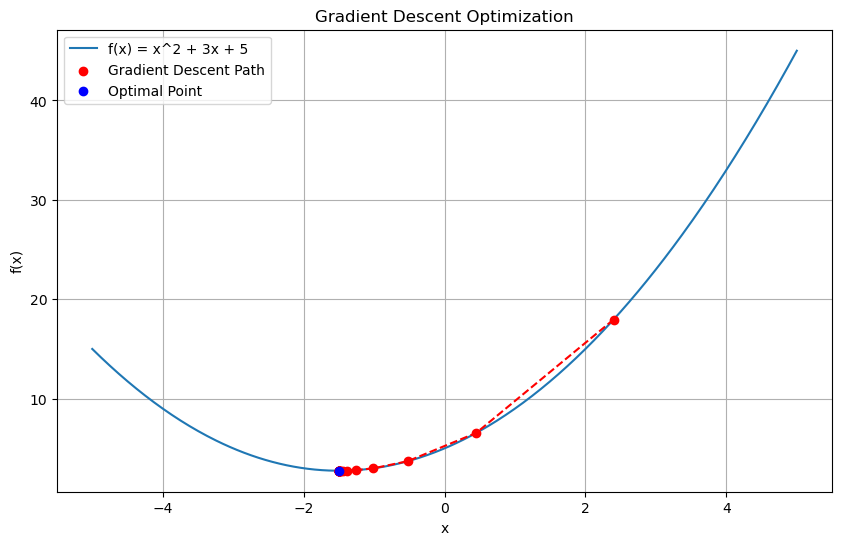

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def gradientDecent(gradient, x_init, alpha, max_iters=10000, precision=1e-8):
    x = x_init
    iterations = 0
    x_values = [x]  # To store the path of x values
    while abs(gradient(x)) > precision and iterations < max_iters:
        x = x - alpha * gradient(x)
        x_values.append(x)
        iterations += 1
    x_opt = x 

    return x_opt, iterations, x_values

def f(x):
    return x**2 + 3*x + 5

def gradient_f(x):
    return 2*x + 3

x_init = 2.4
alpha = 0.25

x_optimal, steps, x_values = gradientDecent(gradient_f, x_init, alpha)
print(x_optimal)
print("min f(x)", f(x_optimal))
print("no of steps", steps)

# Plotting the function f(x)
x_range = np.linspace(-5, 5, 400)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='f(x) = x^2 + 3x + 5')
plt.scatter(x_values, [f(x) for x in x_values], color='red', zorder=5, label='Gradient Descent Path')
plt.plot(x_values, [f(x) for x in x_values], color='red', linestyle='--', zorder=5)
plt.scatter([x_optimal], [f(x_optimal)], color='blue', zorder=5, label='Optimal Point')

plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Linear regression using gradient Descent

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_path = "https://statlearning.com/s/Advertising.csv"


In [6]:
df = pd.read_csv(data_path,index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
# Feature Matrix
X = df[['TV','radio','newspaper']].values
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [19]:
# we add the column of ones in X
X = np.c_[np.ones((X.shape[0],1)),X]


In [12]:
y = df['sales'].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [16]:
y = y.reshape(-1,1)  # -1 is removing the first dimension of the array and 1 means we want to convert it into 1 column
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [21]:
n = X.shape[0] # number of observations
d = X.shape[1] # number of features

In [23]:
def initialize_betas(X,y):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas

betas = initialize_betas(X,y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]
